In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import squarify


In [ ]:
data = pd.read_csv(r'C:\Users\danhk\Downloads\ecommerce retail.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\danhk\\Downloads\\ecommerce retail.csv'

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [ ]:
data = data[~data['StockCode'].str.contains('C')]

In [ ]:
data = data[(data["Quantity"]>0) & (data["UnitPrice"]>0)]


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['TotalPrice']=data["Quantity"]*data["UnitPrice"]

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
now = dt.datetime(2011,12,31)

In [ ]:
RFM = data.groupby("CustomerID").agg(
                                     {'InvoiceDate' : lambda x : (now-x.max()).days,
                                     'InvoiceNo': lambda y : len(y),
                                     'TotalPrice': lambda price : price.sum()})

In [ ]:
RFM
list_column = ['Recency','Frequency','Monetary']
RFM.columns = list_column



In [ ]:
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,346,1,77183.60
12347.0,23,179,4256.90
12348.0,96,31,1797.24
12349.0,39,73,1757.55
12350.0,331,15,306.50
...,...,...,...
18280.0,298,10,180.60
18281.0,201,7,80.82
18282.0,28,12,178.05


In [ ]:
RFM['R'] = pd.qcut(RFM["Recency"],5,labels=[5,4,3,2,1])
RFM['F'] = pd.qcut(RFM["Frequency"],5,labels=[1,2,3,4,5])
RFM['M'] = pd.qcut(RFM["Monetary"],5,labels=[1,2,3,4,5])

In [ ]:
RFM['RFM_Score'] = RFM["R"].astype(str)+RFM['F'].astype(str)+RFM['M'].astype(str)

In [ ]:
RFM.head()
RFM["RFM_Score"]=RFM["RFM_Score"].astype(int)


In [ ]:
def label_rfm_segments(RFM_Score):
    if RFM_Score in [555,554,544,545,454,455,445] :
        return "Champions"
    elif RFM_Score in [543,444,435,355,354,345,344,335] :
        return "Loyal Customers"
    elif RFM_Score in [553,551,552,541,542,533,532,531,452,451,442,441,431,453,433,432,423,353,352,351,342,341,333,323]:
        return "Potential Loyalist"
    elif RFM_Score in [512,511,422,421,412,411,311]:
        return "Recent Customers"
    elif RFM_Score in [525,524,523,522,521,515,514,513,425,424,413,414,415,315,314,313]:
        return "Promising"
    elif RFM_Score in [535,534,443,434,343,334,325,324]:
        return "Customers needing attention"
    elif RFM_Score in [331,321,312,221,213]:
        return "About to Sleep"
    elif RFM_Score in [255,254,245,244,253,252,243,242,235,234,225,224,153,152,145,143,142,135,134,133,125,124]:
        return "At Risk"
    elif RFM_Score in [155,154,144,214,215,115,114,113]:
        return "Can't Lose Them"
    elif RFM_Score in [332,322,231,241,251,233,232,223,222,132,123,122,212,211]:
        return "Hibernating"
    else :
        return "Lost"
    self.RFM_Score = RFM_Score             # store the object as an attribute of self
    return RFM_Score





In [ ]:
RFM["RFM_segment"]=RFM.apply(lambda x: label_rfm_segments(x.RFM_Score),axis=1)


In [ ]:
RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_segment
CustomerID,,,,,,,,
12346.0,346,1,77183.60,1,1,5,115,Can't Lose Them
12347.0,23,179,4256.90,5,5,5,555,Champions
12348.0,96,31,1797.24,2,3,4,234,At Risk
12349.0,39,73,1757.55,4,4,4,444,Loyal Customers
12350.0,331,15,306.50,1,2,2,122,Hibernating


In [ ]:
 RFM.groupby('RFM_segment').mean().sort_values("Monetary")

C:\Users\danhk\AppData\Local\Temp\ipykernel_10012\3871082751.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  RFM.groupby('RFM_segment').mean().sort_values("Monetary")


,Recency,Frequency,Monetary,RFM_Score
RFM_segment,,,,
Lost,298.304348,11.858124,176.567803,113.983982
Recent Customers,50.033223,10.903654,202.929037,399.760797
About to Sleep,101.482558,19.203488,297.680058,278.075581
Hibernating,170.672749,23.909976,392.504235,207.654501
Potential Loyalist,49.242126,59.860236,580.268998,426.921260
Customers needing attention,52.809524,57.766234,1422.658312,416.199134
At Risk,171.834135,79.937500,1542.020529,212.918269
Promising,38.305556,16.729167,2292.272153,469.354167
Loyal Customers,59.431762,120.550868,2473.210124,389.426799


In [ ]:
RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_segment
CustomerID,,,,,,,,
12346.0,346,1,77183.60,1,1,5,115,Can't Lose Them
12347.0,23,179,4256.90,5,5,5,555,Champions
12348.0,96,31,1797.24,2,3,4,234,At Risk
12349.0,39,73,1757.55,4,4,4,444,Loyal Customers
12350.0,331,15,306.50,1,2,2,122,Hibernating


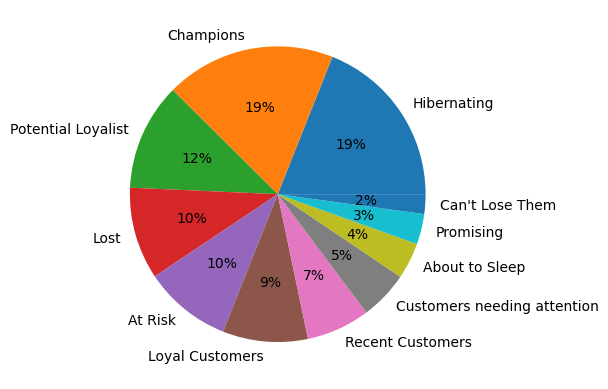

In [ ]:
plt.pie(RFM["RFM_segment"].value_counts(),labels = RFM.RFM_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
treemap = RFM.RFM_segment.value_counts(normalize=True)

In [ ]:
new = [str(round(i*100,2))+'%' for i in treemap.values]
labels = list(treemap.index+'='+new)

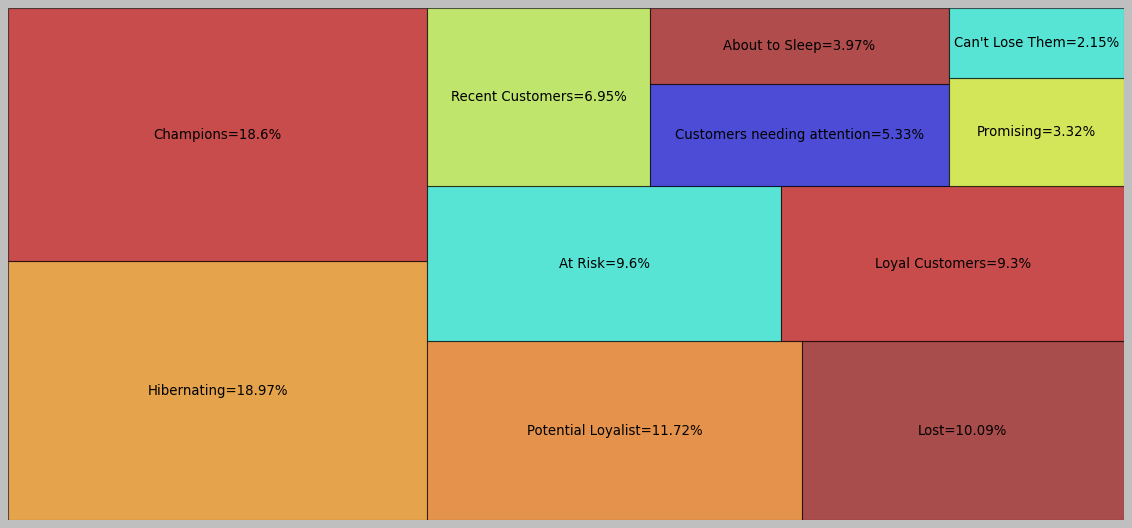

In [ ]:
plt.style.use('classic')
plt.rcParams.update({'font.size':12})
plt.figure(figsize=(18,8))
squarify.plot(sizes=treemap.values,label=labels,alpha=0.6)
plt.axis('off')
plt.show()


- Với khách hàng Champion : là khách hàng thân thiết và đem lại giá trị lớn thì chúng ta có thể chăm sóc và khuyến khích khách hàng quay lại bằng cách đề xuất chương trình khách hàng thân thiết với những giá trị khác biệt và được cá nhân hóa cao hơn . Ngoài ra với nhóm khác hàng đem lại giá trị lớn này , có thể đề xuất các mặt hàng có giá trị lớn hơn , combo sản phẩm tốt dựa trên lịch sử đơn hàng để tăng doanh thu



- Với khách hàng Loyal Customer và Potential Loyalist : đây là những khách hàng mua nhiều lần , nhưng giá trị giỏ hàng không cao  , chúng ta có thể đề xuất quà tặng miễn phí cho các giao dịch trên giá trị trung bình mọi khi


- Với khách hàng Recenct Customer và Promising : khách hàng mua gần nhất nhưng chưa mua thường xuyên và đang trong giai đoạn trải nghiệm , có thể giúp họ hài lòng hơn ở những trải nghiệm đầu tiên bằng cách tặng voucher cho những lần mua tiếp theo , tương tác với khách hàng bằng cách đề xuất những thông tin về các sản phẩm tương tự với giỏ hàng đầu tiên


- Với khách hàng Customer Needing Attention và At risk : khách hàng không quay lại mua hàng , cần kiểm tra điều gì khiến họ không hài lòng và k quay lại mua hàng , có thể đề xuất các chương trình giá trị hơn


- Với khách hàng About to Sleep , Hibernating , Lost : khách hàng k quay lại , sức mua yếu , có thể tương tác social media ,gửi chương trình khuyến mại qua email cá nhân , các discount giảm giá , ưu đãi độc quyền
    